In [1]:
import pandas as pd

In [2]:
wsb_df = pd.read_csv('wsb.csv')

In [3]:
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [4]:
wsb_df.shape

(48, 4)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

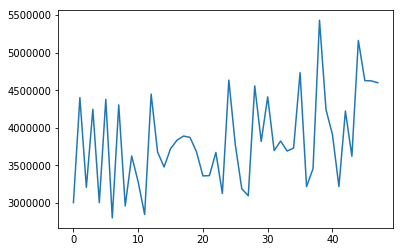

In [6]:
plt.plot(wsb_df['Sale Quantity'])

In [7]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
Month                    48 non-null int64
Sale Quantity            48 non-null int64
Promotion Expenses       48 non-null int64
Competition Promotion    48 non-null int64
dtypes: int64(4)
memory usage: 1.6 KB


# Forecasting using Moving Average

In [8]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window=12).mean().shift(1)

In [9]:
wsb_df[['Sale Quantity','mavg_12']]

,Sale Quantity,mavg_12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


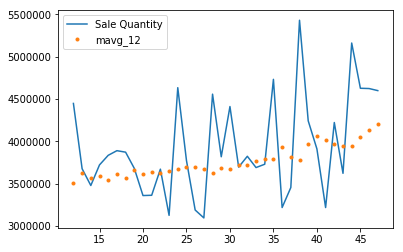

In [10]:
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['mavg_12'][12:],'.')
plt.legend()

Mean Absolute Percentage Error

In [11]:
import numpy as np

In [12]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual- predicted)/actual)) * 100,2)

In [13]:
get_mape(wsb_df['Sale Quantity'][36:].values,wsb_df['mavg_12'][36:].values)

14.04

So forecasting using moving average gives us MAPE is 14.04%.

Root Mean Square Error

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values,wsb_df['mavg_12'][36:].values))

734725.8359239782

RMSE in this case is 734725.84. So MA model indicates that the prediction by the model has a standard deviation of 734725.84

# Forecasting using Expnetial Smoothing

In [18]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha = 0.2).mean()

In [19]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3.928410e+06,3.828235e+06
37,38,3453239,128,0,3.810280e+06,3.753220e+06
38,39,5431651,170,0,3.783643e+06,4.088962e+06
39,40,4241851,160,0,3.970688e+06,4.119544e+06
40,41,3909887,151,1,4.066369e+06,4.077608e+06
41,42,3216438,120,1,4.012413e+06,3.905359e+06
42,43,4222005,152,0,3.962370e+06,3.968693e+06
43,44,3621034,125,0,3.946629e+06,3.899157e+06
44,45,5162201,170,0,3.940490e+06,4.151777e+06
45,46,4627177,160,0,4.052117e+06,4.246860e+06


In [20]:
get_mape(wsb_df['Sale Quantity'][36:].values,wsb_df['ewm'][36:].values)

11.15

So forecasting using exponential smoothing has about 11.15 error. There is improvement compared to the MA model.  

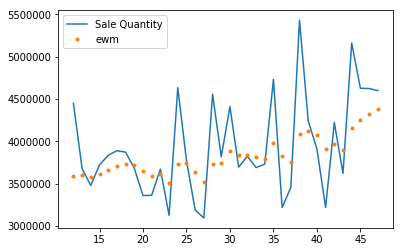

In [21]:
plt.plot(wsb_df['Sale Quantity'][12:])
plt.plot(wsb_df['ewm'][12:],'.')
plt.legend()

# Decomposing Time Series

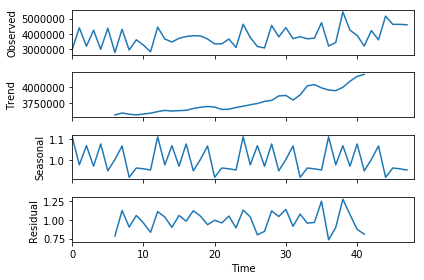

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']),model='multiplicative', freq=12)
ts_plot = ts_decompose.plot()

Sales Quantity in dataset has trend, which is increasing over a period. Also it has seasonality. Sessonality index varies from 0.9 to 1.1.

In [23]:
wsb_df['seasonal'] = ts_decompose.seasonal
wsb_df['trend'] = ts_decompose.trend

In [24]:
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm,seasonal,trend
0,1,3002666,105,1,NaN,3.002666e+06,1.109382,NaN
1,2,4401553,145,0,NaN,3.779825e+06,0.976219,NaN
2,3,3205279,118,1,NaN,3.544356e+06,1.066938,NaN
3,4,4245349,130,0,NaN,3.781819e+06,0.969683,NaN
4,5,3001940,98,1,NaN,3.549823e+06,1.075204,NaN
5,6,4377766,156,0,NaN,3.774242e+06,0.947747,NaN
6,7,2798343,98,1,NaN,3.527268e+06,1.001735,3.563623e+06
7,8,4303668,144,0,NaN,3.713851e+06,1.065780,3.593567e+06
8,9,2958185,112,1,NaN,3.539289e+06,0.916931,3.574635e+06
9,10,3623386,120,0,NaN,3.558131e+06,0.961237,3.564107e+06
